# Анализ данных, суррогатное моделирование и оптимизция в прикладных задачах #

к.т.н. Савельев Андрей Александрович \
savelyev.aa@mipt.ru

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#О-курсе" data-toc-modified-id="О-курсе-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>О курсе</a></span><ul class="toc-item"><li><span><a href="#Содержание-курса" data-toc-modified-id="Содержание-курса-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Содержание курса</a></span></li><li><span><a href="#Содержание-курса" data-toc-modified-id="Содержание-курса-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Содержание курса</a></span></li><li><span><a href="#Основная-литература" data-toc-modified-id="Основная-литература-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Основная литература</a></span></li><li><span><a href="#Видеокурсы" data-toc-modified-id="Видеокурсы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Видеокурсы</a></span></li><li><span><a href="#Технические-особенности" data-toc-modified-id="Технические-особенности-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Технические особенности</a></span></li><li><span><a href="#Организационные-вопросы" data-toc-modified-id="Организационные-вопросы-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Организационные вопросы</a></span></li></ul></li><li><span><a href="#Пример-прикладной-задачи" data-toc-modified-id="Пример-прикладной-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Пример прикладной задачи</a></span><ul class="toc-item"><li><span><a href="#Многорежимное-проектирование-сопла" data-toc-modified-id="Многорежимное-проектирование-сопла-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Многорежимное проектирование сопла</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Процесс-сходимости-однокритериальной-задачи" data-toc-modified-id="Процесс-сходимости-однокритериальной-задачи-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Процесс сходимости однокритериальной задачи</a></span></li><li><span><a href="#Фронт-Парето" data-toc-modified-id="Фронт-Парето-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Фронт Парето</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li></ul></li><li><span><a href="#Постановка-задачи-—-1" data-toc-modified-id="Постановка-задачи-—-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Постановка задачи — 1</a></span><ul class="toc-item"><li><span><a href="#Три-типа-машинного-обучения" data-toc-modified-id="Три-типа-машинного-обучения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Три типа машинного обучения</a></span></li><li><span><a href="#Задача-восстановления-регрессии" data-toc-modified-id="Задача-восстановления-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Задача восстановления регрессии</a></span></li></ul></li><li><span><a href="#Постановка-задачи-—-2" data-toc-modified-id="Постановка-задачи-—-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Постановка задачи — 2</a></span></li><li><span><a href="#Литература" data-toc-modified-id="Литература-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Литература</a></span></li></ul></div>

## О курсе ##

 - Кто?
 - Что?
 - Зачем?

### Содержание курса ###

1. Введение
2. Основные сведения из линейной алгебры
   - Умножение матриц (4 способа), ранг матрицы
   - Системы линейных уравнений: $A\mathbf{x} = \mathbf{b}$
   - Псевдорешения и псевдообратные матрицы
   - Разложения матриц: $A=CR$, $A=LU$, $A=QR$
   - Собственные числа и вектора, разложение $A = X \Lambda X^{-1}$
   - Ортогональные, симметричные и положительно определённые матрицы 
   - Сингулярное разложение матрицы
3. Основные сведения из теории вероятностей
   - Элементарная теория вероятностей. Вероятностная модель, условная вероятность, формула Байеса
   - Случайные величины и их распределения. Числовые характеристики случайных величин
   - Многомерное ноормальное распределение. Ковариационная матрица, маргинальные и условные распределения

### Содержание курса ###

4. Машинное обучение и оптимизация
   - Линейная регрессия, гребневая регрессия, лассо Тибширани
   - Метод главных компонент
   - Методы оптимизации
5. Гауссовские случайные процессы
   - Случайные процессы: базовые понятие и примеры
   - Гауссовские случайные процессы
   - Регрессия на основе гауссовских процессов
   - Влияние параметров ядра и амплитуды шума
   - Алгоритм эффективной глобальной оптимизации

### Основная литература ###

1. Воронцов К.В. [Математические методы обучения по прецендентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). 141 c.
1. Strang G. Linear algebra and learning from data. Wellesley-Cambridge Press, 2019. 432 p.
1. Ширяев А.Н. Вероятность &mdash; 1. М.: МЦНМО, 2007. 517 с.
1. Материалы авторов [P. Roelants](https://peterroelants.github.io/) и [M. Krasser ](http://krasserm.github.io/).

### Видеокурсы ###

Курсы лекций, находящиеся в открытом доступе:

1. [Линейная алгебра](https://www.youtube.com/watch?v=WNl10xl1QT8&list=PLthfp5exSWEqSRXkZgMMzTSXL_WwMV9wK), к.ф.-м.н. Павел Александрович Кожевников, МФТИ
2. [Теория вероятностей](https://www.youtube.com/watch?v=Q3h9P7lhpNc&list=PLyBWNG-pZKx7kLBRcNW3HXG05BDUrTQVr&index=1), д.ф.-м.н. Максим Евгеньевич Широков, МФТИ
3. [Машинное обучение](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=1), д.ф.-м.н. Константин Вячеславович Воронцов, ШАД (Яндекс)
4. [Matrix Methods in Data Analysis, Signal Processing, and Machine Learning](https://www.youtube.com/watch?v=Cx5Z-OslNWE&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k), prof. Gilbert Strang, MIT

### Технические особенности ###

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../modules')
import graph_support

In [2]:
# Styles
import warnings 
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

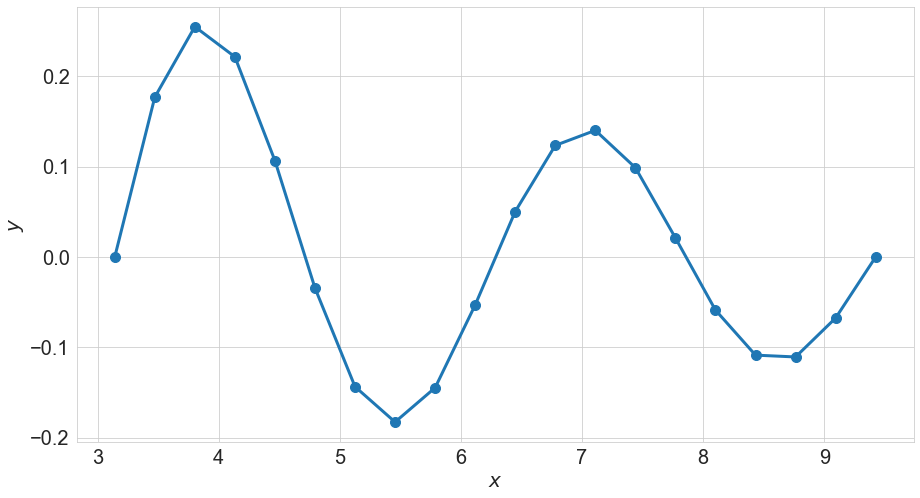

In [3]:
# Data
X = np.linspace(np.pi, 3*np.pi, 20)  # Independent variable x
Y = 1/X * np.sin(2*X)       # Dependent variable

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(X, Y, 'o-', label='data: $(x,y)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Организационные вопросы ###

1. Время и место: четверг, 10.35, 212 к.
1. Связь через почту. Прошу написать мне письмо на адрес savelyev.aa@mipt.ru:
   - ФИО
   - курс, группа, кафедра
   - предпочтительные день недели и время занятий

---

## Пример прикладной задачи ##

### Многорежимное проектирование сопла ###

#### Постановка задачи ####

**Объект:** Сопло сверхзвукового пассажирского самолёта

**Цель:** Многорежимная оптимизация модельной геометрии сопла (режимы $M=0.9$ и $M=1.7$)

**Варьируемые параметры:** 8 геометрических параметров

**Метод решения**: Скаляризация целевой функции &mdash; преобразования векторной целевой функции в скалярную посредством взвешенной суммы её компонент: $F_{obj}\left(\vec{f}(\vec{x})\right) = \omega_1 f_1(\vec{x}) + \dots + \omega_n f_n(\vec{x})$.

Многокритериальная задача сводится к множеству однокритериальных, каждая из которых характеризуется набором весовых коэффициентов $\Omega = \{\omega_1, \dots, \omega_n\}$.

#### Процесс сходимости однокритериальной задачи ####

In [4]:
from IPython.display import Image
im_width = 1200

In [5]:
%%html
<style>
    .container.slides .celltoolbar, .container.slides .hide-in-slideshow {display: None ! important;}
</style>

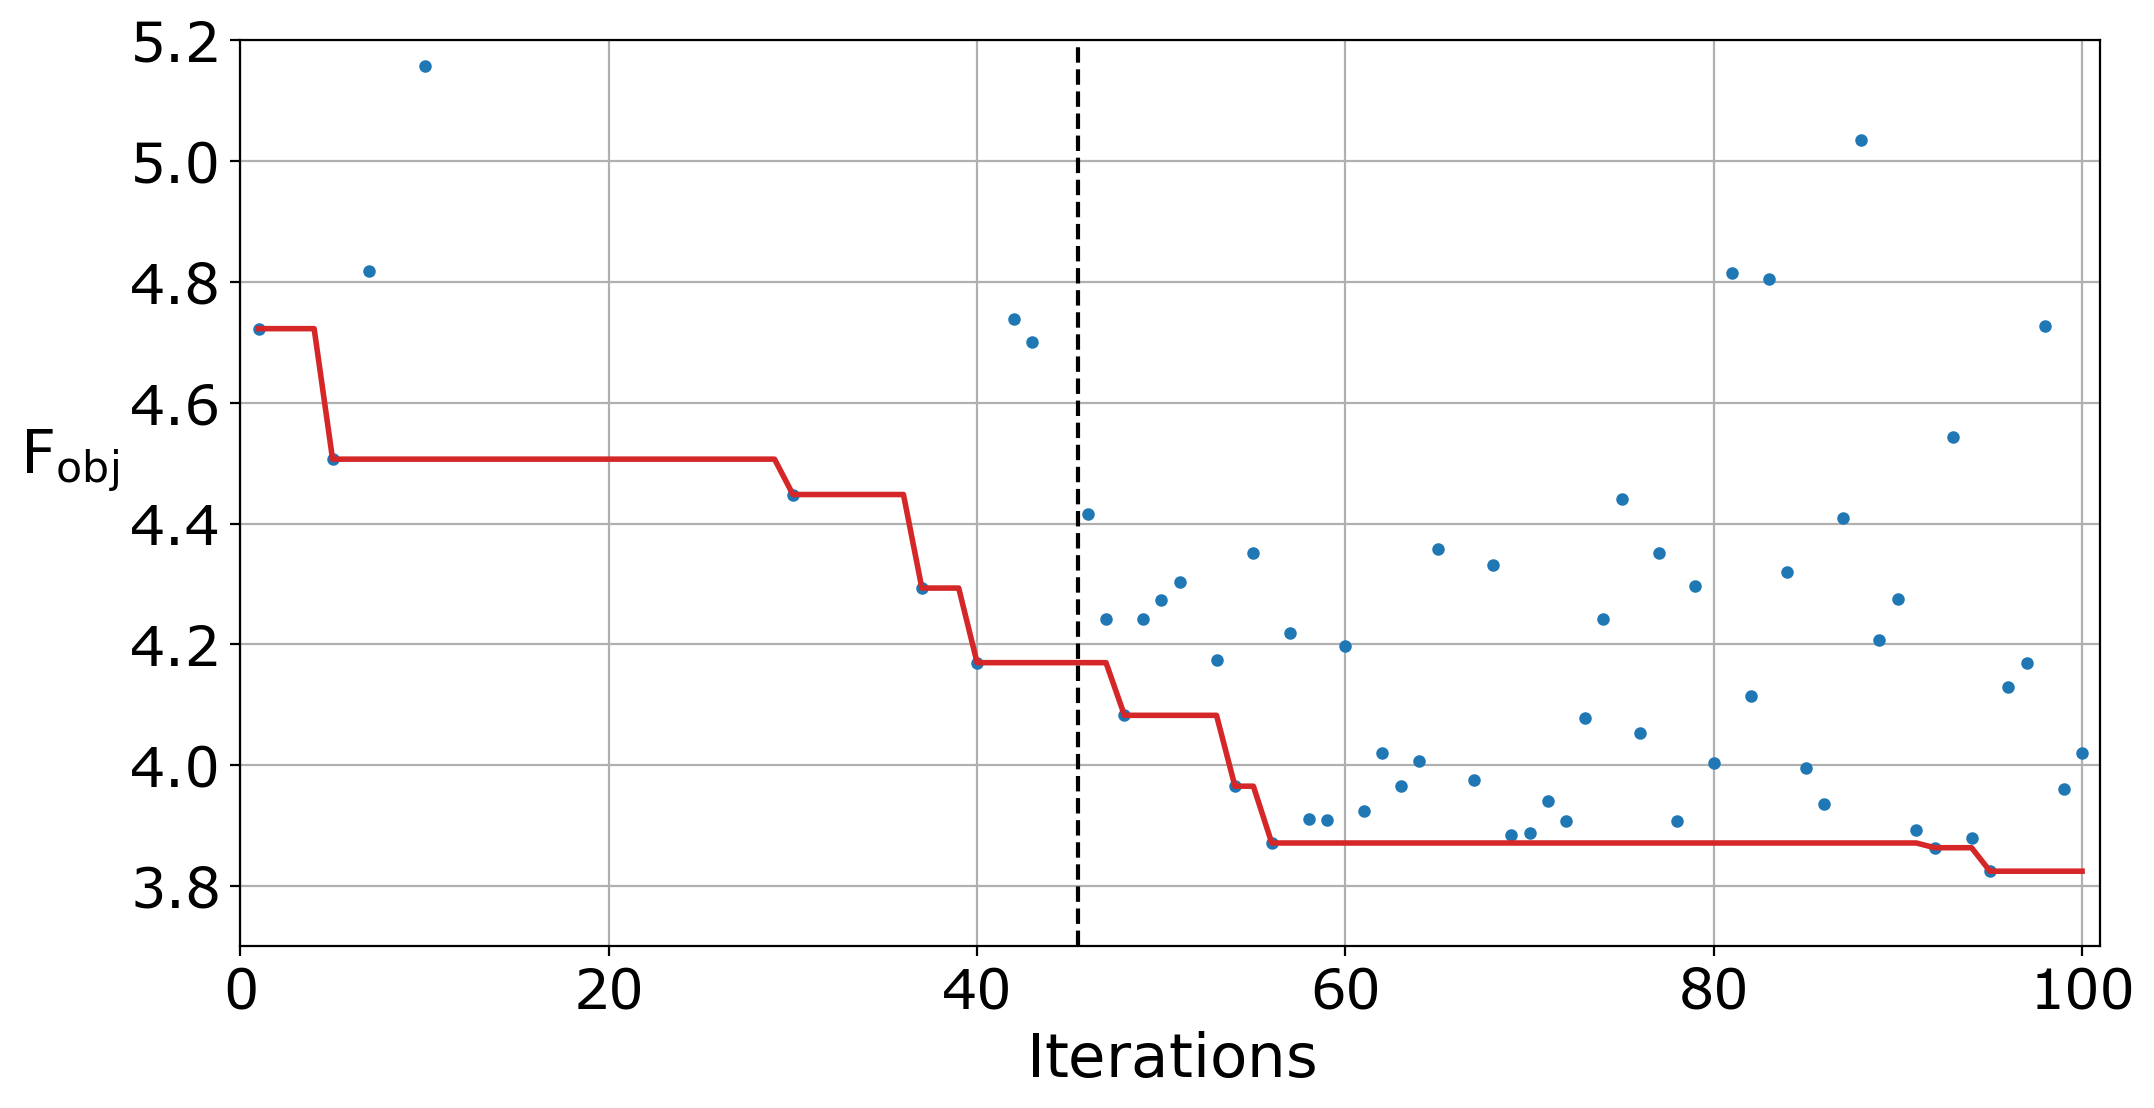

In [20]:
graph_support.hide_code_in_slideshow()
display(Image('../pix/1.Intro/res_sub030sup070.png', width=im_width))

#### Фронт Парето ####

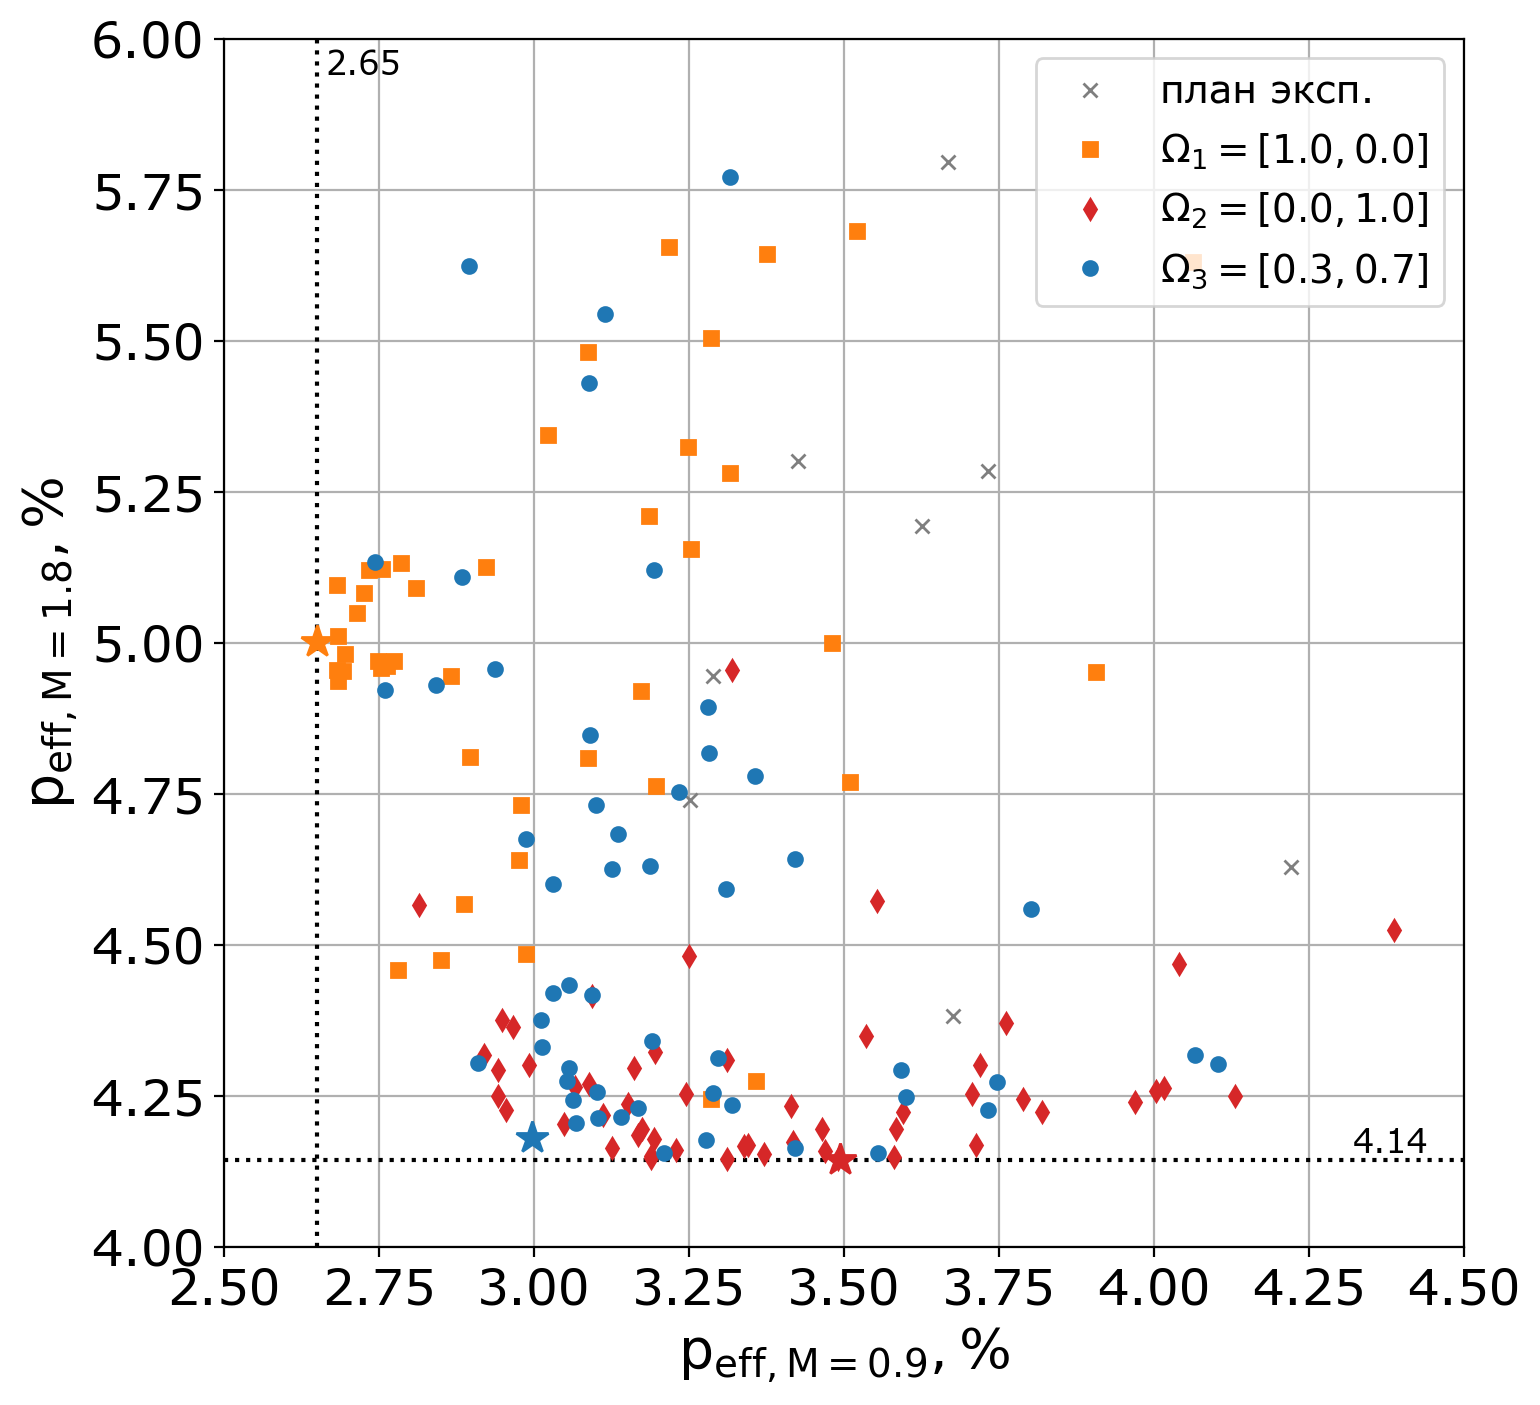

In [21]:
graph_support.hide_code_in_slideshow()
display(Image('../pix/1.Intro/res_pareto_1-4.png', width=0.8*im_width))

#### Результаты ####

Вариант $\mathbf \Omega = \{0.3, 0.7\}$

Режим M=0.9


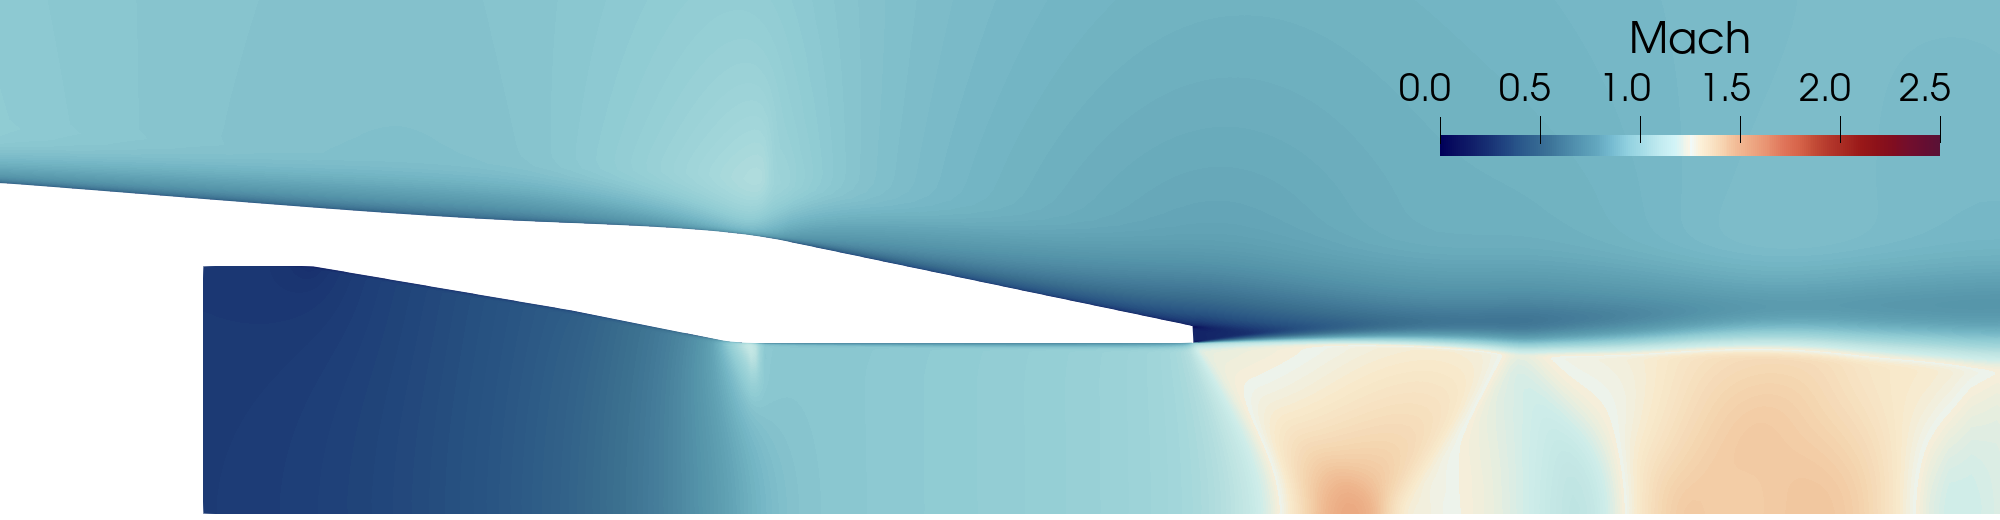

----------------------------------------
Режим M=1.8


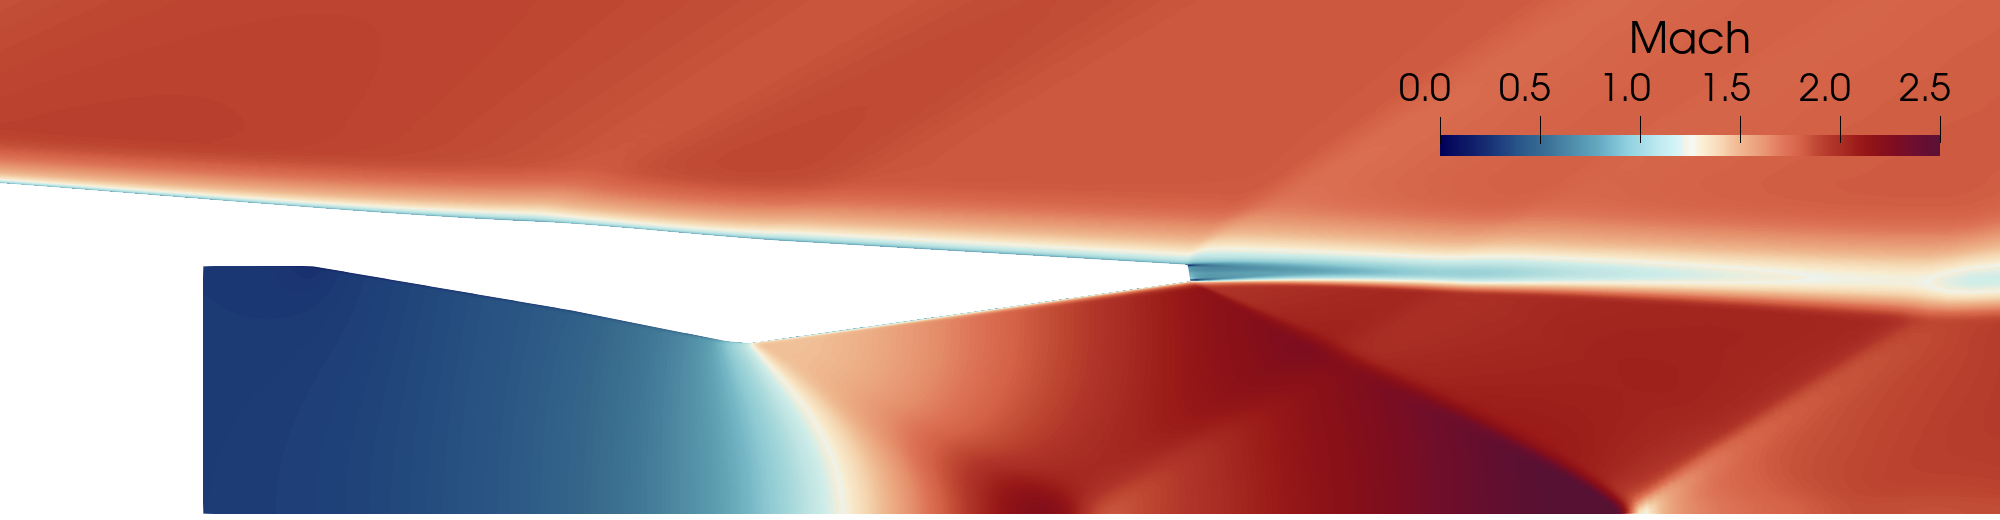

In [23]:
graph_support.hide_code_in_slideshow()
print('Режим M=0.9')
display(Image('../pix/1.Intro/i095.r1m090.Mach.png', width=im_width))
print(40*'-')
print('Режим M=1.8')
display(Image('../pix/1.Intro/i095.r2m180.Mach.png', width=im_width)) 

---

## Постановка задачи &mdash; 1 ##

### Три типа машинного обучения ###

1. **Обучение с учителем** (*есть правильный ответ*)
   - классификация
   - регрессия
1. **Обучение без учителя** (*немаркированные данные*)
   - кластеризация
   - снижение размерности
1. **Обучение с подкреплением** (*определено вознаграждение*)

### Задача восстановления регрессии ###

> Регрессия &mdash; это наука о том, как через точки провести линию.

In [24]:
# Define the data
n = 20
# Underlying relation
X_train = np.linspace(0, 1, n)  # Independent variable x
Y_true = np.sin(3*np.pi*X_train)     # Dependent variable y
# Noise
np.random.seed(42)
e_std = 0.4  # Standard deviation of the noise
err = e_std * np.random.randn(n)  # Noise
# Output
Y_train = Y_true + err  # Dependent variable with noise

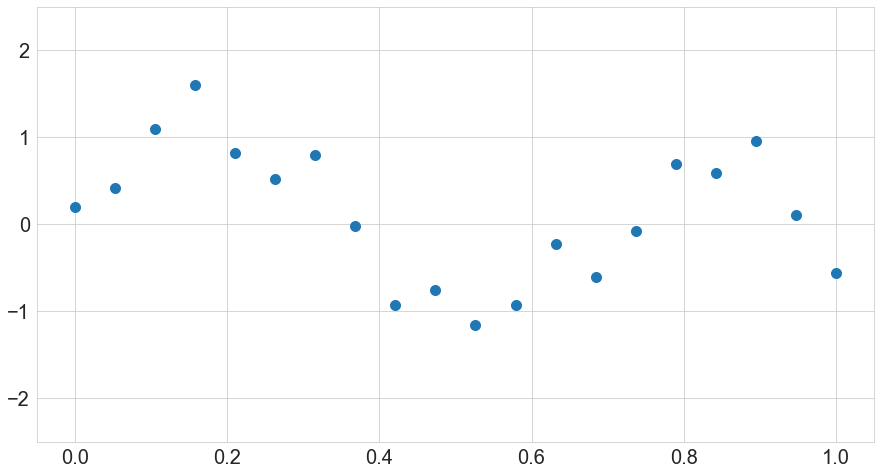

In [25]:
# Show data
figsize = (15, 8)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.show()

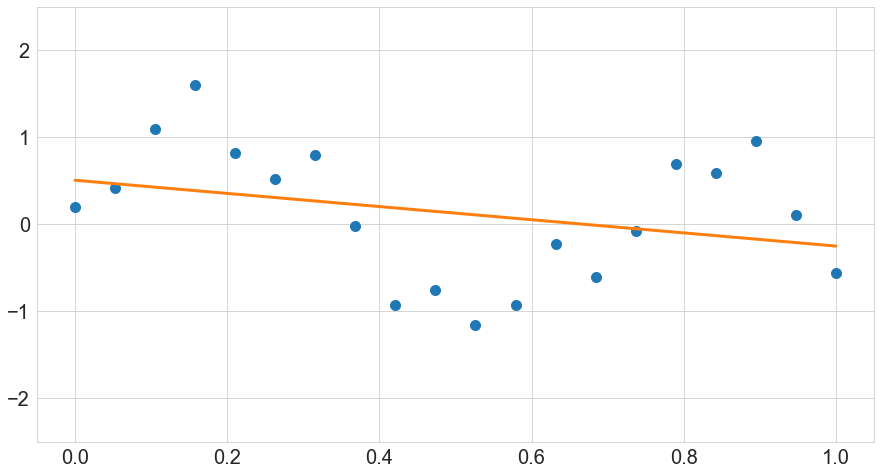

In [26]:
p1 = np.polyfit(X_train, Y_train, 1)
X_disp = np.linspace(0, 1, 1001)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, np.polyval(p1, X_disp), '-', c=cm(1), label='model 1')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.show()

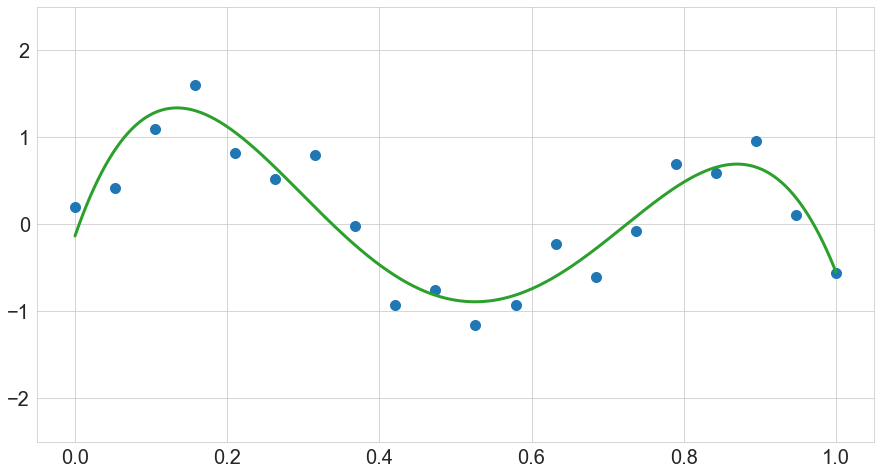

In [27]:
p2 = np.polyfit(X_train, Y_train, 4)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, np.polyval(p2, X_disp), '-', c=cm(2), label='model 2')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.show()

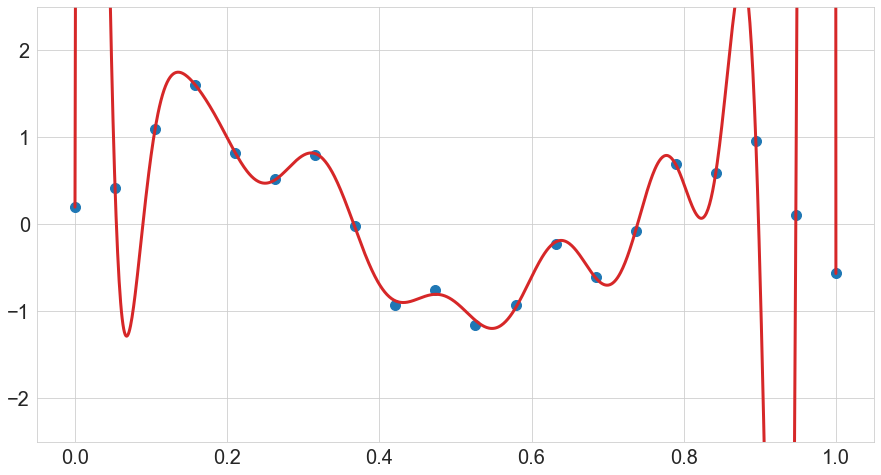

In [28]:
p3 = np.polyfit(X_train, Y_train, n-1)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, np.polyval(p3, X_disp), '-', c=cm(3), label='model 3')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.show()

In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [30]:
# graph_support.hide_code_in_slideshow()
rbf = ConstantKernel(1.) * RBF(length_scale=0.1)
gpr = GaussianProcessRegressor(kernel=rbf, n_restarts_optimizer=20)

# Reuse training data from previous 1D example
gpr.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_disp.reshape(-1, 1), return_cov=True)

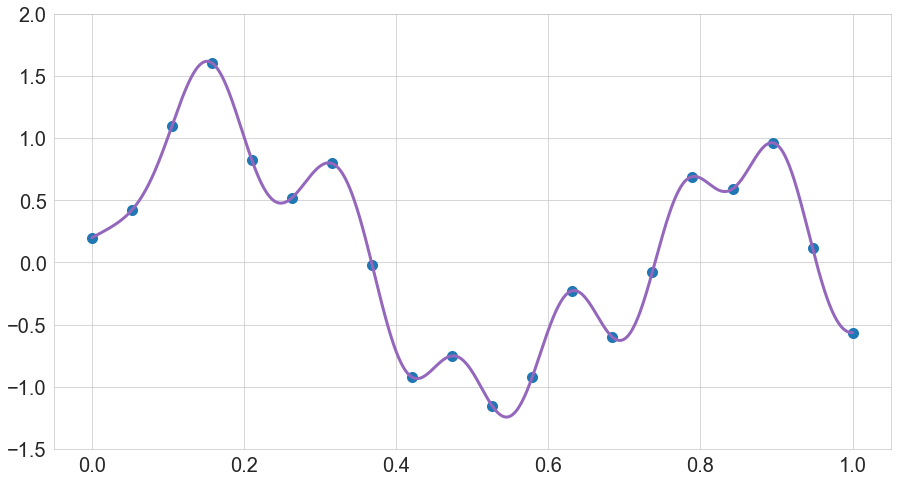

In [31]:
# Show data
fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, mu_s, '-', c=cm(4), label='GP')
plt.xlim((-0.05, 1.05))
plt.ylim((-1.5, 2.0))
# plt.legend()
plt.show()

In [32]:
# graph_support.hide_code_in_slideshow(  )
gpr = GaussianProcessRegressor(kernel=rbf, alpha=4e-1, n_restarts_optimizer=20)

# Reuse training data from previous 1D example
gpr.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_disp.reshape(-1, 1), return_cov=True)

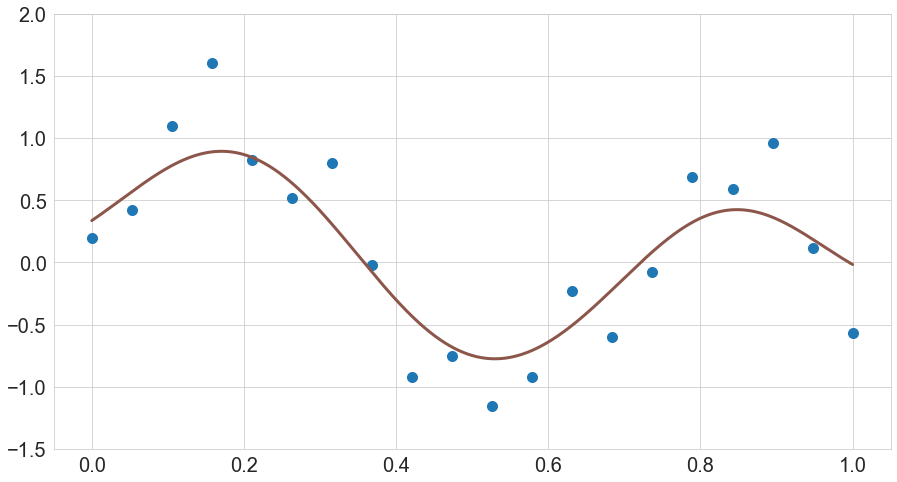

In [33]:
# Show data
fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, mu_s, '-', c=cm(5), label='GP with err')
plt.xlim((-0.05, 1.05))
plt.ylim((-1.5, 2.0))
# plt.legend()
plt.show()

## Постановка задачи &mdash; 2##

**Задача**: построить функцию корректно описывающую обучающие данные и **обобщающую их на неизвестные данные**.

Пусть задано множество **объектов** $X$ и множество допустимых **ответов** $Y$. \
Мы предполагаем существование зависимости $y:X \rightarrow Y$. \
Значения функции $y_i = y(x_i)$ известны только на конечном подмножестве объектов $\{x_1, \ldots, x_l\} \subset X$.

Пары &laquo;объект&ndash;ответ&raquo; $(x_i, y_i)$ называются *прецендентами*, а совокупность пар $X^l = (x_i, y_i)_{i=1}^l$ &mdash; **обучающей выборкой**.

Требуется построить алгоритм (&laquo;**функцию регрессии**&raquo;) $a: X \rightarrow Y$, аппроксимирующий целевую зависимость $y$.

**Признак** $f$ объекта $x$ &mdash; это результат измерения некоторой характеристики объекта.

Пусть имеется набор признаков $f_1, \ldots, f_n$.

Совокупность признаковых описаний всех объектов выборки $X_l$, записанную в виде таблицы размера $l \times n$, называют **матрицей объектов&ndash;признаков**:
$$
  \mathbf{F} = 
  \begin{pmatrix}
    f_1(x_1) & \ldots & f_n(x_1) \\
    \ldots   & \ddots & \ldots   \\
    f_1(x_l) & \ldots & f_n(x_l) \\
  \end{pmatrix}.
$$

Матрица объектов–признаков является стандартным и наиболее распространённым способом представления исходных данных в прикладных задачах.

---

## Литература ##

1. *Воронцов К.В.* [Математические методы обучения по прецендентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.
1. *Рашка С.* Python и машинное обучение. &mdash; М.: ДМК Пресс, 2017. &mdash; 418 с.


In [34]:
# Versions used
print('python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

python: 3.7.4
numpy: 1.18.1
matplotlib: 3.1.3
seaborn: 0.10.0
